<a href="https://colab.research.google.com/github/muhammadibrohimov-ai/NLP-lessons/blob/master/CNN_activation_fx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

%matplotlib inline

In [20]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizatsiyta
x_train, x_test = x_train / 255.0 , x_test / 255.0

# Converting dataset into 4 dimensional data , (28, 28) -> (28, 28, 1)
x_train = np.expand_dims(x_train, axis = -1)
x_test = np.expand_dims(x_test, axis = -1)

In [21]:
def build_cnn_model(activation):

    model = Sequential([
        Conv2D(16, (3, 3), activation = activation, padding = 'same', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation = activation, padding = 'same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(10, activation = activation),
        Dense(10, activation = 'softmax'),
    ])

    model.compile(
        optimizer = tf.keras.optimizers.SGD(),
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy'],
    )

    return model

In [5]:
activations = ['sigmoid', 'relu', 'elu', 'tanh', 'selu', 'swish']

histories = {}

for activation in activations:
    print(activation)
    model = build_cnn_model(activation)
    history = model.fit(
                x_train, y_train, epochs=10,
                batch_size=32,
                validation_data = (x_test, y_test),
                verbose=0
            )

    histories[activation] = history

sigmoid


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


relu
elu
tanh
selu
swish


In [12]:
for activation, history in histories.items():
    test_loss, test_acc = history.model.evaluate(x_test, y_test, verbose=0)
    print(test_acc * 100)

66.7900025844574
86.77999973297119
88.1600022315979
87.9800021648407
89.12000060081482
86.73999905586243


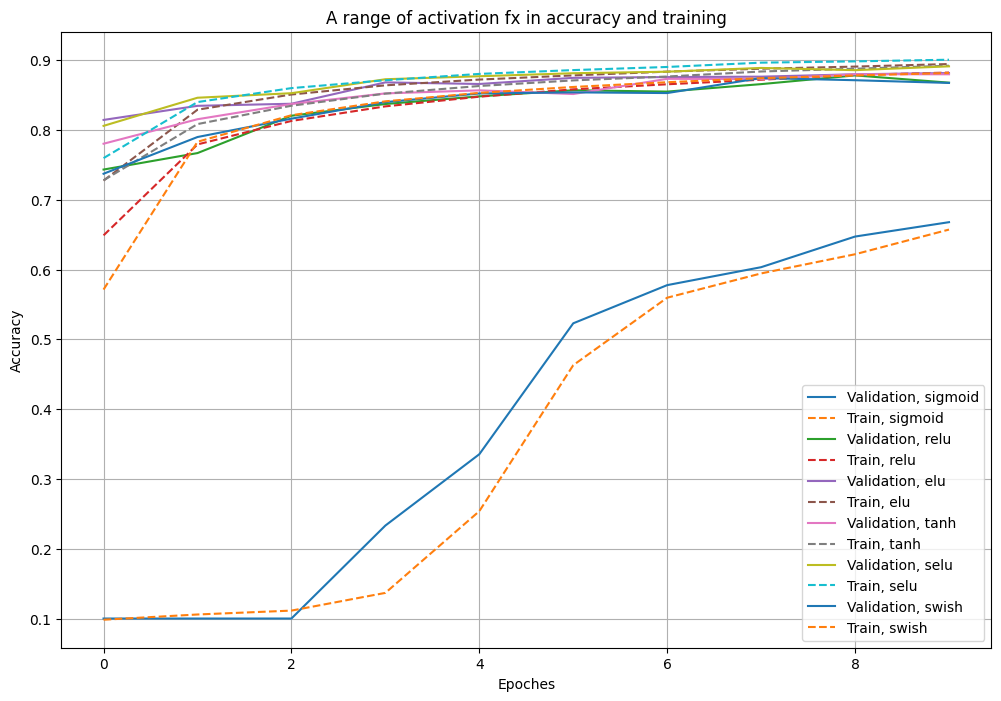

In [17]:
plt.figure(figsize = (12, 8))
for activation, history in histories.items():
    plt.plot(history.history['val_accuracy'], label = f'Validation, {activation}')
    plt.plot(history.history['accuracy'], '--', label = f'Train, {activation}',)

plt.title('A range of activation fx in accuracy and training')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [18]:
# Hyperparametrs for CNN

# Filter num
# Filter size
# Actication function
# Padding
# Stride
# Input shape
